In [55]:
# load package
from cryptory import Cryptory
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
np.set_printoptions(suppress=True)

In [30]:
# initialise object 
# pull data from start of 2017 to present day
my_cryptory = Cryptory(from_date = "2017-01-01")

# get historical bitcoin prices from coinmarketcap
my_cryptory.extract_coinmarketcap("bitcoin").head()

,date,open,high,low,close,volume,marketcap
0,2019-05-03,5505.55,5865.88,5490.20,5768.29,18720780006,101986240859
1,2019-05-02,5402.42,5522.26,5394.22,5505.28,14644460907,97330112147
2,2019-05-01,5350.91,5418.00,5347.65,5402.70,13679528236,95501110091
3,2019-04-30,5247.73,5363.26,5224.19,5350.73,13878964574,94573826827
4,2019-04-29,5284.86,5311.27,5216.49,5247.35,13735490672,92737510865


In [442]:
all_coins_df = my_cryptory.extract_bitinfocharts("btc")
# coins of interest
bitinfocoins = ["btc", "eth", "xrp", "ltc", "dash", "xmr", "doge"]
for coin in bitinfocoins[1:]:
    all_coins_df = all_coins_df.merge(my_cryptory.extract_bitinfocharts(coin), on="date", how="left")

In [443]:
all_coins_df = all_coins_df.fillna(0)
all_coins_df.set_index('date',inplace=True)
all_coins_df = all_coins_df.reindex(index=all_coins_df.index[::-1])
all_coins_df.head()

,btc_price,eth_price,xrp_price,ltc_price,dash_price,xmr_price,doge_price
date,,,,,,,
2017-01-01,970.988,8.233,0.00651,4.389,11.356,13.532,0.000224
2017-01-02,1010.000,8.182,0.00640,4.539,11.593,14.671,0.000222
2017-01-03,1017.000,8.811,0.00632,4.525,12.383,16.125,0.000220
2017-01-04,1075.000,10.440,0.00642,4.585,14.748,16.807,0.000226
2017-01-05,1045.000,10.479,0.00650,4.404,14.815,16.713,0.000225


In [477]:
tokens = all_coins_df.columns.tolist()
tokens

['btc_price',
 'eth_price',
 'xrp_price',
 'ltc_price',
 'dash_price',
 'xmr_price',
 'doge_price']

In [445]:
all_coins_df.tail()

,btc_price,eth_price,xrp_price,ltc_price,dash_price,xmr_price,doge_price
date,,,,,,,
2019-04-30,5265.0,158.496,0.306,71.086,109.446,61.716,0.00245
2019-05-01,5354.0,161.126,0.305,73.231,114.102,63.580,0.00250
2019-05-02,5432.0,160.495,0.304,73.269,116.763,64.995,0.00257
2019-05-03,5704.0,166.240,0.309,77.391,119.319,66.477,0.00266
2019-05-04,5750.0,164.132,0.302,77.448,120.244,67.009,0.00264


In [448]:
all_coins_df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-04'],
              dtype='datetime64[ns]', name='date', length=854, freq=None)

In [449]:
data = []

coinNames = iter(all_coins_df)
next(coinNames)

for index, coin in enumerate(tokens):
    coin_chart_info = go.Scatter(
        x = all_coins_df.index,
        y = all_coins_df[coin].tolist(),
        mode = 'lines',
        name = coin[:-6])
    data.append(coin_chart_info)
    tokens[index] = coin[:-6]

In [450]:
layout = go.Layout(
    title = "Historic Price Over Time")

fig = dict(data=data, layout = layout)
py.iplot(fig, filename='stacked-area-plot-hover')

/Users/chris/Google Drive/Uct/Academic/Financial Software Engineering/Take Home exam/Answers/Q3/CryptoPortfolioTester/venv/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [511]:
initial_price = all_coins_df.head(1)
initial_price

,btc_price,eth_price,xrp_price,ltc_price,dash_price,xmr_price,doge_price
date,,,,,,,
2017-01-01,970.988,8.233,0.00651,4.389,11.356,13.532,0.000224


In [513]:
initial_price = np.array(initial_price)[0]
initial_price

array([970.988   ,   8.233   ,   0.00651 ,   4.389   ,  11.356   ,
        13.532   ,   0.000224])

In [514]:
INVEST = 1000

In [515]:
initial_weights = np.ones(len(tokens)) / len(tokens)
initial_weights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [516]:
initial_allocation = INVEST * initial_weights / initial_price
initial_allocation[np.isinf(initial_allocation)] = 0
initial_allocation

array([     0.14712555,     17.35177248,  21944.2615756 ,     32.54890473,
           12.57988225,     10.55698661, 637755.10204082])

In [517]:
initial_positions = initial_allocation * initial_price
initial_positions

array([142.85714286, 142.85714286, 142.85714286, 142.85714286,
       142.85714286, 142.85714286, 142.85714286])

In [518]:
initial_portfolio_value = initial_positions.sum().sum()
initial_portfolio_value

1000.0000000000001

In [519]:
tokens

['btc_price',
 'eth_price',
 'xrp_price',
 'ltc_price',
 'dash_price',
 'xmr_price',
 'doge_price']

In [522]:
hodl = {}
rb = {}

current_allocation = initial_allocation

for i, current_price in all_coins_df.iterrows():
    # hodl positions
    hodl[i] = initial_allocation * current_price
    
    # current positions
    current_positions = current_allocation * current_price
    rb[i] = current_positions
    
    # rebalance
    current_portfolio_value = current_positions.sum()
    if(current_price>0):
    current_allocation = current_portfolio_value * initial_weights / current_price

In [525]:
hodl = pd.DataFrame(hodl).T
rb = pd.DataFrame(rb).T

In [541]:
all_coins_df.min()

btc_price     781.292000
eth_price       8.182000
xrp_price       0.000000
ltc_price       3.729000
dash_price      0.000000
xmr_price      10.490000
doge_price      0.000201
dtype: float64

In [531]:
hodl_value = hodl.sum(axis=1)
# print(hodl_value)
rb_value = rb.sum(axis=1)
print(rb_value)

hodl_perf = 1 - (1 / ((hodl_value.iloc[-1] / hodl_value.iloc[0])))
rb_perf = 1 - (1 / ((rb_value.iloc[-1] / rb_value.iloc[0])))

2017-01-01    1000.000000
2017-01-02    1021.053518
2017-01-03    1054.086791
2017-01-04    1134.129687
2017-01-05    1124.949468
2017-01-06    1040.698065
2017-01-07     986.061420
2017-01-08    1018.195540
2017-01-09    1014.132874
2017-01-10    1035.812807
2017-01-11    1001.911331
2017-01-12     951.050825
2017-01-13     968.691539
2017-01-14     977.319916
2017-01-15     963.410829
2017-01-16     964.433827
2017-01-17    1006.159831
2017-01-18    1016.232484
2017-01-19    1025.246221
2017-01-20    1042.530594
2017-01-21    1040.803000
2017-01-22    1043.041121
2017-01-23    1038.944921
2017-01-24    1022.078472
2017-01-25    1006.352174
2017-01-26    1015.742265
2017-01-27    1032.287031
2017-01-28    1035.177816
2017-01-29    1035.876925
2017-01-30    1044.437163
                 ...     
2019-04-05            inf
2019-04-06            inf
2019-04-07            inf
2019-04-08            inf
2019-04-09            inf
2019-04-10            inf
2019-04-11            inf
2019-04-12  

/Users/chris/Google Drive/Uct/Academic/Financial Software Engineering/Take Home exam/Answers/Q3/CryptoPortfolioTester/venv/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



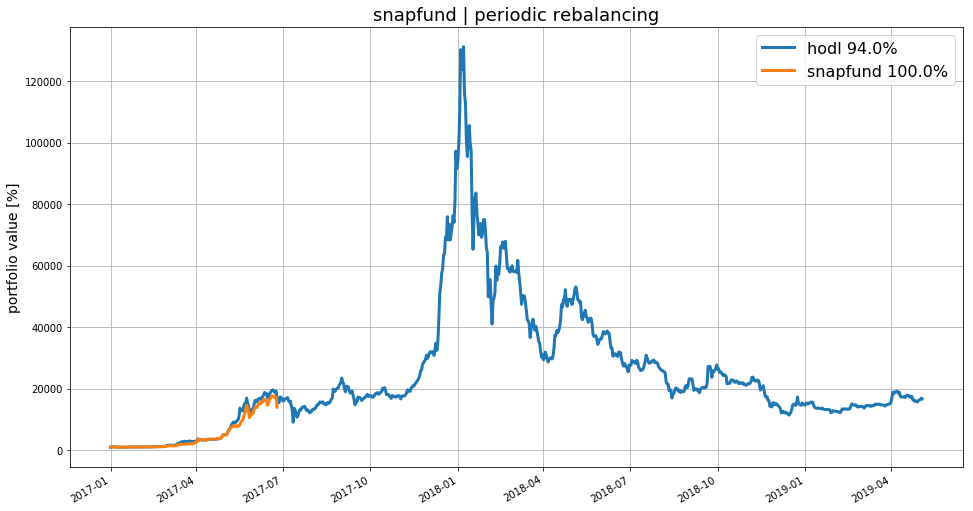

In [527]:
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.plot(hodl_value, label='hodl {:.1f}%'.format(hodl_perf * 100), linewidth=3)
ax.plot(rb_value, label='rebalance {:.1f}%'.format(rb_perf * 100), linewidth=3)
ax.grid(True, 'both')
ax.set_ylabel('portfolio value [%]', fontsize=14)
ax.legend(fontsize=16)
ax.set_title('snapfund | periodic rebalancing', fontsize=18)
fig.autofmt_xdate();